<a href="https://colab.research.google.com/github/kAi3345/Astron/blob/main/Fitting_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [3]:
dat = astropy.io.ascii.read("Tonry_2003.vot")                                        # read the data from the paper
distance = 10**dat["col8"] / 72.0 * u.mpc                                            # the distance of the galaxies
velocity = 10**dat["col7"] * u.km / u.s                                              # the velocity of the galaxies
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc    # distance errors


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [4]:
x = distance.to(u.mpc).value                                                    # extract the numerical values of distances and convert to mpc
ind = np.where((x > 0) & (x < 300))                                             # choose the data only from the local universe
x = velocity.to(u.km / u.s).value[ind]                                          # extract the numerical values of velocities and convert to km/s
y = distance.to(u.mpc).value[ind]                                               # choose the distance data only for local universe
yerr = distance_error.to(u.mpc).value[ind]                                      # only use the distance error data in the local universe

In [5]:
matrix = np.vander(x, 2)                                                        # make a Vandermonde matrix using the velocity of galaxies
diagonalMatrix = np.diag(yerr * yerr)                                           # make a diagonal matrix with the square of distance errors
transposeMatrix  = np.dot(matrix.T, matrix / (yerr**2)[:, None])                # make a transpose matrix using velocity and diagonal matrix
cov = np.linalg.inv(transposeMatrix)                                            # inverse the transpose matrix
parameter = np.linalg.solve(transposeMatrix, np.dot(matrix.T, y / yerr**2))     # using linalg.solve function to get the slope and interception of the line
# print the result
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(parameter[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(parameter[1], np.sqrt(cov[1, 1])))

Least-squares estimates:
m = 0.015 ± 0.000
b = -6.354 ± 0.225


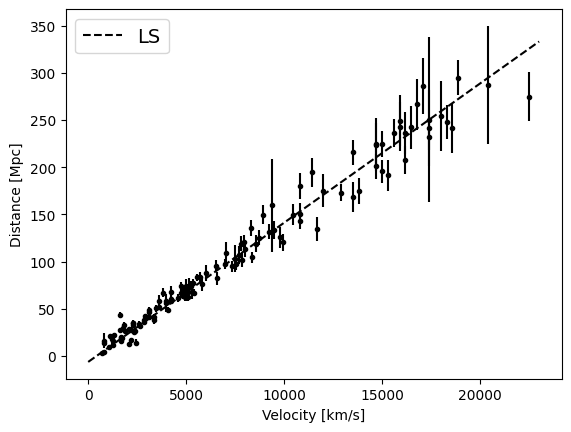

In [6]:
x0 = np.linspace(0, 23000, 300)                                                 # the velocity interval is between 0 and 23000 with each spaced 300
# print the picture
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, np.dot(np.vander(x0, 2), parameter), "--k", label="LS")
plt.legend(fontsize=14)
plt.ylabel("Distance [Mpc]")
plt.xlabel("Velocity [km/s]");

In [7]:
x = distance.to(u.mpc).value                                                    # extract the numerical values of distances and convert to mpc
ind = np.where(x > 700)                                                        # choose the data only from the distance universe
x = velocity.to(u.km / u.s).value[ind]                                          # extract the numerical values of velocities and convert to km/s
y = distance.to(u.mpc).value[ind]                                               # choose the distance data only for distance universe
yerr = distance_error.to(u.mpc).value[ind]                                      # only use the distance error data in the local universe

In [8]:
# generate matrix using the velocity data and distance error data
matrix = np.vander(x, 2)
diagonalMatrix = np.diag(yerr * yerr)
transposeMatrix  = np.dot(matrix.T, matrix / (yerr**2)[:, None])
cov = np.linalg.inv(transposeMatrix)                                            # inverse the transpose matrix
parameter = np.linalg.solve(transposeMatrix, np.dot(matrix.T, y / yerr**2))     # using linalg.solve to get the least squared residuals slope and interception
# print the result
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(parameter[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(parameter[1], np.sqrt(cov[1, 1])))

Least-squares estimates:
m = 0.019 ± 0.001
b = -223.105 ± 82.046


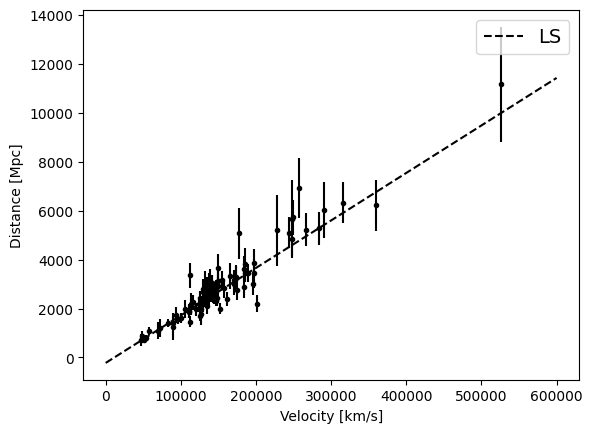

In [16]:
x0 = np.linspace(0, 600000, 400)                                                # the velocity ranger from 20000 to 150000 with each spaced 700
# print the picture
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, np.dot(np.vander(x0, 2), parameter), "--k", label="LS")
plt.legend(fontsize=14)
plt.ylabel("Distance [Mpc]")
plt.xlabel("Velocity [km/s]");